In [113]:
import pandas as pd


In [115]:
data = pd.read_csv("D:/SEM-5/ML/Assignments/My Codes/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
print("Shape of the dataset :",data.shape)

Shape of the dataset : (200, 5)


In [119]:
print("Checking if missing values : ")
data.isnull().sum()

Checking if missing values : 


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [121]:
data.columns.tolist()

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [125]:
label = LabelEncoder()
data['Genre'] = label.fit_transform(data['Genre'])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [127]:
#some clustering such as k-means needs the scaling data in which the data is in the 
#from of standard normal distribution (mean = 0,varience=1)
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980


In [129]:
from sklearn.model_selection import train_test_split

In [131]:
train,test = train_test_split(data,test_size = 0.3,random_state = 42)

In [133]:
from sklearn.cluster import KMeans

In [135]:
kmeans = KMeans(n_clusters=3,random_state = 42)
train['Cluster'] = kmeans.fit_predict(train[['Annual Income (k$)', 'Spending Score (1-100)']])
train.head()

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
169,170,1,32,1.009200,0.496916,2
97,98,0,27,-0.021375,-0.007764,1
31,32,0,21,-1.166458,0.885132,1
12,13,0,58,-1.548152,-1.366519,1
35,36,0,21,-1.051949,1.195704,1


In [137]:
from sklearn.cluster import AgglomerativeClustering

In [139]:
agglo = AgglomerativeClustering(n_clusters = 3)
train['Cluster-Agglo'] = agglo.fit_predict(train[['Annual Income (k$)', 'Spending Score (1-100)']]) 
train.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster-Agglo
169,170,1,32,1.009200,0.496916,2,2
97,98,0,27,-0.021375,-0.007764,1,0
31,32,0,21,-1.166458,0.885132,1,0
12,13,0,58,-1.548152,-1.366519,1,0
35,36,0,21,-1.051949,1.195704,1,0


In [226]:
import matplotlib.pyplot as plt

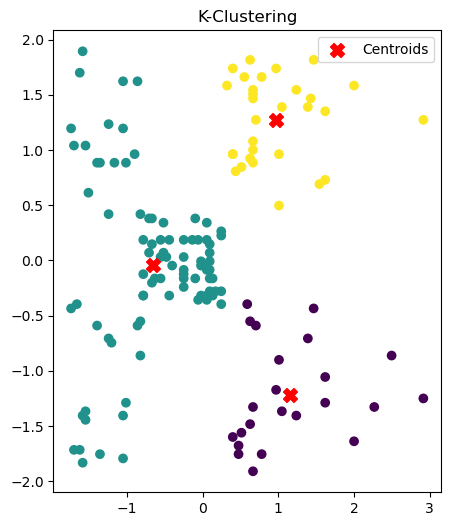

In [240]:
centroids = kmeans.cluster_centers_

plt.figure(figsize = (5,6))
plt.title("K-Clustering")
plt.scatter(train['Annual Income (k$)'],train['Spending Score (1-100)'],c=train['Cluster'])
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label = 'Centroids', marker ='X')
plt.legend()
plt.show()


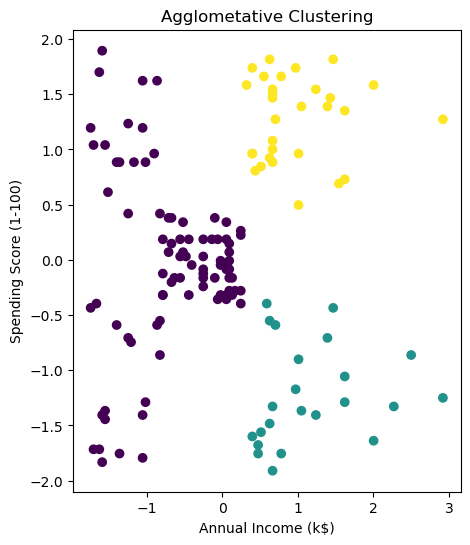

In [244]:
plt.figure(figsize = (5,6))
plt.scatter(train['Annual Income (k$)'],train['Spending Score (1-100)'],c=train['Cluster-Agglo'])
plt.title("Agglometative Clustering")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()